<a href="https://colab.research.google.com/github/Himagination/Books/blob/master/HOML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

- Build a Model of Housing prices in the state using California census data.

## Get the data

In [1]:
import os
import tarfile
import urllib
import urllib.request
import numpy as np
import pandas as pd

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, 
                       housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# As the ocean_proximity shows some repetitive data, it is probably a categorical data
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


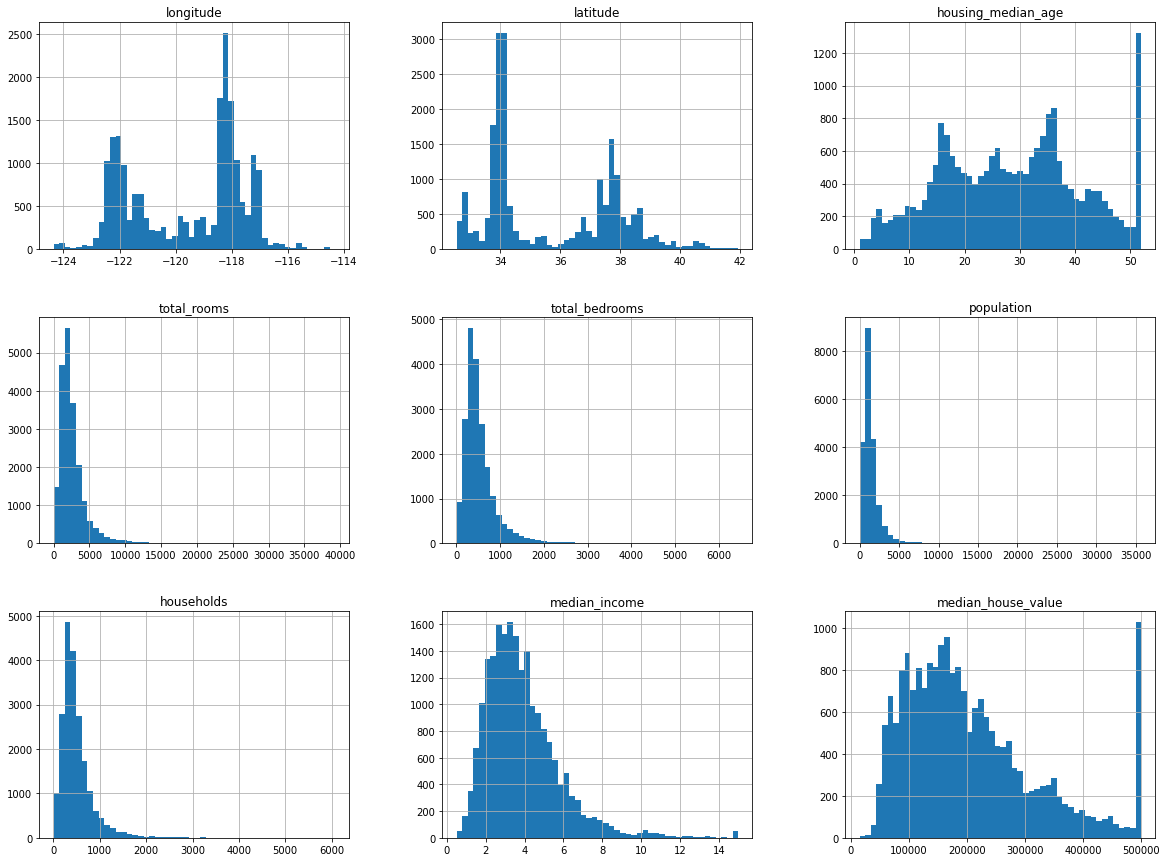

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# # Create test set at this stage to avoid snooping bias
# import numpy as np

# def split_train_test(data, test_ratio):
#   np.random.seed(31415926)
#   shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data) * test_ratio)
#   test_indices = shuffled_indices[:test_set_size]
#   train_indices = shuffled_indices[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# Split train test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)

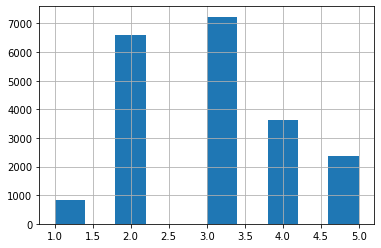

In [13]:
# Using Stratified sampling for spiltting the data around median_income
# Create a temporary feature - income_cat
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [14]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, 
                               test_size=0.2, 
                               random_state=31415926)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
# Remove the income_cat attribute as the sampling is done
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

## Visualization

In [17]:
# Create a copy of the dataset before playing it with
housing = strat_train_set.copy()

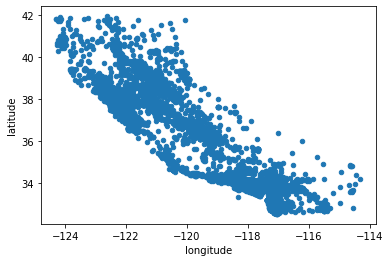

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude")

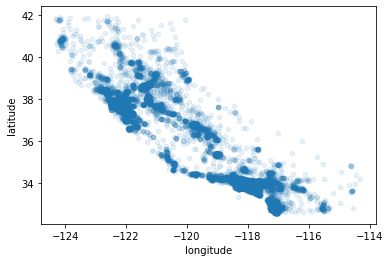

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

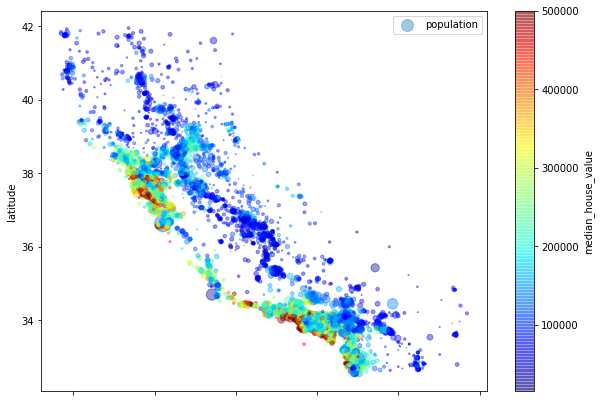

In [20]:
# Visualize housing prices
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             alpha=0.4, 
             s=housing["population"]/100, 
             label="population", 
             figsize=(10, 7), 
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True)
plt.legend()

## Looking for correlations

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688787
total_rooms           0.135748
housing_median_age    0.106647
households            0.069398
total_bedrooms        0.052109
population           -0.021502
longitude            -0.049886
latitude             -0.140083
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd9231310>,
      dtype=object)

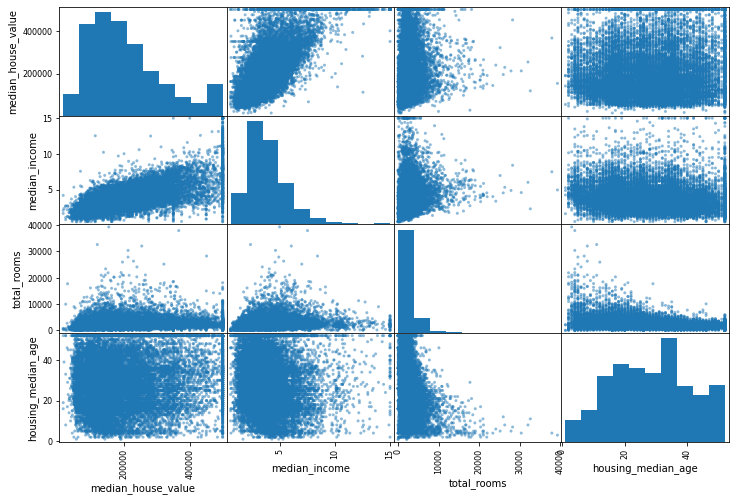

In [22]:
# Another way to visualize correlation matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

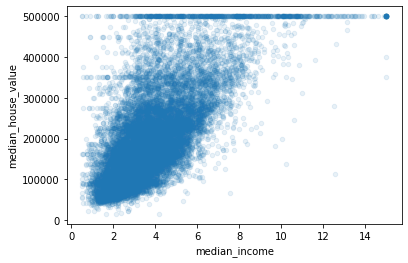

In [23]:
housing.plot(kind="scatter", 
             x="median_income", 
             y="median_house_value", 
             alpha=0.1)

In [24]:
# Experimenting with attribute combinations
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_house"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [25]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688787
rooms_per_household         0.163436
total_rooms                 0.135748
housing_median_age          0.106647
households                  0.069398
total_bedrooms              0.052109
population                 -0.021502
population_per_household   -0.026644
longitude                  -0.049886
latitude                   -0.140083
bedrooms_per_house         -0.254874
Name: median_house_value, dtype: float64

## Preparing Data for Machine Learning Algorithms

In [26]:
# Separate Features and Labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
# Handling Missing values using Scikitt-Learn SimpleImputer
# As SimpleImputer works only with numerical values, create a copy of data without text attribute
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
# inspect the Imputer instance variable
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2124.    ,  435.    , 1166.5   ,
        410.    ,    3.5355])

In [29]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2124.    ,  435.    , 1166.5   ,
        410.    ,    3.5355])

In [30]:
# Transform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, 
                          columns=housing_num.columns, 
                          index=housing_num.index)

## Handling Text and Categorical Attribute

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
18074,<1H OCEAN
12954,INLAND
3005,INLAND
15224,NEAR OCEAN
15551,<1H OCEAN
1002,INLAND
9376,NEAR BAY
5229,<1H OCEAN
3538,<1H OCEAN
2076,INLAND


In [32]:
# Convert categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [4.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [1.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
# Using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [35]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
# Custom Transformations
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, 
               add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Transformation Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")), 
                         ("attribs_adder", CombinedAttributesAdder()), 
                         ("std_scaler", StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [311513.87650265 156121.09960639 116113.09232297 297253.81994598
 183444.95669144]


In [42]:
print("Labels:", list(some_labels))

Labels: [335900.0, 121200.0, 97900.0, 240900.0, 171600.0]


In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67942.81360588172

**Try a more complex model: DecisionTreeRegressor**

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Evaluation using Cross-Validation

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [47]:
# Function to view result
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

In [48]:
display_scores(tree_rmse_scores)

Scores:  [67246.02382487 69983.64978575 68011.89146601 69918.71517063
 71355.91717557 69075.87146355 70793.99776794 73447.92226194
 74264.04997462 70525.28496348]
Mean:  70462.33238543637
Standard deviation:  2075.4636667619675


In [49]:
# Use Cross Validation for linear regression model
lin_scores = cross_val_score(lin_reg, 
                             housing_prepared, 
                             housing_labels, 
                             scoring="neg_mean_squared_error", 
                             cv=10)

In [50]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [70510.1162717  70478.24466675 68241.45544038 68711.63447614
 68401.47270103 64467.15574085 68916.32926246 68601.15546086
 68039.05756003 65765.03567912]
Mean:  68213.16572593206
Standard deviation:  1771.79331523078


In [51]:
# Try Random Forest 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, 
                                housing_prepared, 
                                housing_labels, 
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse = np.sqrt(-forest_scores)

In [52]:
forest_rmse

array([50780.64533121, 50948.78945967, 49367.5885139 , 49278.64844834,
       50150.7722773 , 49687.02396048, 51002.94162321, 49992.37967612,
       52212.53440744, 48529.52567608])

In [53]:
display_scores(forest_rmse)

Scores:  [50780.64533121 50948.78945967 49367.5885139  49278.64844834
 50150.7722773  49687.02396048 51002.94162321 49992.37967612
 52212.53440744 48529.52567608]
Mean:  50195.08493737568
Standard deviation:  1011.6105517478926


In [54]:
from sklearn.svm import SVR
SVR_reg = SVR(kernel="linear")
SVR_reg.fit(housing_prepared, housing_labels)
SVR_scores = cross_val_score(SVR_reg, 
                             housing_prepared, 
                             housing_labels, 
                             scoring="neg_mean_squared_error", 
                             cv=10)
SVR_rmse = np.sqrt(-SVR_scores)
display_scores(SVR_rmse)

Scores:  [112597.71192562 112873.28030746 112280.37402129 111251.69393545
 112502.87846218 108854.13822117 112325.15213719 112401.70213331
 110245.24953659 109116.8475954 ]
Mean:  111444.90282756621
Standard deviation:  1431.2672518958102


## Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 
               'n_estimators': [3, 10], 
               'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5, 
                           scoring="neg_mean_squared_error", 
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [58]:
cvres = grid_search.cv_results_

In [59]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64007.54501155575 {'max_features': 2, 'n_estimators': 3}
55001.39339465999 {'max_features': 2, 'n_estimators': 10}
52916.37897476885 {'max_features': 2, 'n_estimators': 30}
59697.00582154091 {'max_features': 4, 'n_estimators': 3}
52483.15311901908 {'max_features': 4, 'n_estimators': 10}
50695.04355057849 {'max_features': 4, 'n_estimators': 30}
58647.92785834235 {'max_features': 6, 'n_estimators': 3}
52400.70835622349 {'max_features': 6, 'n_estimators': 10}
50121.56143271379 {'max_features': 6, 'n_estimators': 30}
58828.146114184536 {'max_features': 8, 'n_estimators': 3}
52980.56065129154 {'max_features': 8, 'n_estimators': 10}
50241.12852666294 {'max_features': 8, 'n_estimators': 30}
62121.154137675745 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53363.97063587851 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59882.43950574533 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52818.723963956916 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [60]:
# Analyzing the best models and their errors
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.79736956e-02, 7.48864173e-02, 4.18554580e-02, 1.81130350e-02,
       1.61668769e-02, 1.83176334e-02, 1.55108031e-02, 2.92716747e-01,
       6.47938131e-02, 1.06504349e-01, 9.83416792e-02, 9.78796448e-03,
       1.54590477e-01, 1.47854944e-04, 3.96869147e-03, 6.32450519e-03])

In [61]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.29271674671765785, 'median_income'),
 (0.1545904769498855, 'INLAND'),
 (0.10650434865453562, 'pop_per_hhold'),
 (0.09834167921570772, 'bedrooms_per_room'),
 (0.0779736956266657, 'longitude'),
 (0.07488641732599213, 'latitude'),
 (0.06479381314857827, 'rooms_per_hhold'),
 (0.04185545800002387, 'housing_median_age'),
 (0.018317633381825522, 'population'),
 (0.018113034996058913, 'total_rooms'),
 (0.016166876851188183, 'total_bedrooms'),
 (0.01551080305523493, 'households'),
 (0.00978796447749881, '<1H OCEAN'),
 (0.006324505188540766, 'NEAR OCEAN'),
 (0.00396869146657386, 'NEAR BAY'),
 (0.00014785494403245808, 'ISLAND')]

## Evaluating on Test Set

In [62]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([45989.45534487, 50227.10650247])